In [1]:
#First thing I will do is call in the appropriate packages needed.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


In [2]:
df = pd.read_table('dataset.txt') # This reads in the data file. I set it as df for ease of use later.
t_data = df['t (s)']    #The data of time in seconds I set as t_data
v_data = df['V (volts)'] #the data of volts I set as v_data 

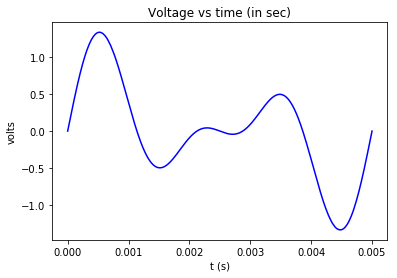

In [3]:
# Now we will graph the data

plt.figure()
plt.title('Voltage vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b-')
plt.show()

Now that we have a visual of how voltage changes with respect to time, we can see that it is a combination of multiple 
waves to create a "Fourier series" type wave. Now we want to do a curve fit to this Fourier series. First, we have to define the function to calculate the values of $a_1$, $a_2$, $a_3$, $a_4$, and $\omega$. The equation for this Fourier series is $$V(t) = a_{1}sin(\omega t) + a_{2}sin(2\omega t) + a_{3}sin(3\omega t) + a_{4}sin(4\omega t)$$

In [4]:
def fs(t, a_1, a_2, a_3, a_4, omega): #define the function parameters
    #return the function parameters into the equation I want to use to do a curve fit
    return  a_1*np.sin(omega*t) + a_2*np.sin(2*omega*t) + a_3*np.sin(3*omega*t) + a_4*np.sin(4*omega*t)
    
    
p0=[1,1,1,1,2*np.pi/0.005]
parameters, stats = curve_fit(fs, t_data, v_data,p0) #used for curve fitting
#Parameters is a list of best fit values

a1_best = parameters[0]
a2_best = parameters[1]
a3_best = parameters[2]
a4_best = parameters[3]
omega_best= parameters[4]

print("The Fourier coefficients and omega are: a\u2081 = ",a1_best, ", a\u2082 =",a2_best, ", a\u2083 =",a3_best, ", a\u2084 =",a4_best, ", \u03C9 =",omega_best, )


The Fourier coefficients and omega are: a₁ =  0.2499200090583292 , a₂ = 0.7501812633801311 , a₃ = 0.5001885968768162 , a₄ = -1.9244595190115066e-05 , ω = 1256.6275893705254


 Now, we want to plot the curve fit to the plot of the data.

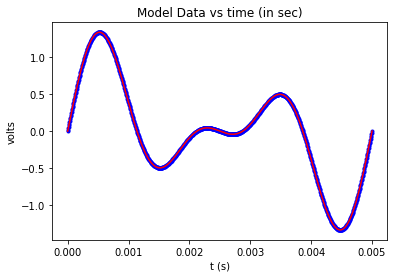

In [7]:
#calculate the model data (curve fit)
v_model = fs(t_data, a1_best, a2_best, a3_best, a4_best, omega_best)

#plot the curve fit to the data
plt.figure()
plt.title('Model Data vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b.')
plt.plot(t_data, v_model, 'r-')
plt.show()

The figure above shows the plot of the best curve fit and the plot of the data. The best curve fit is the same as the data curve.

Now what I want to do is show the individual waves that make up this wave function.

I will begin with the wave $a_1sin(\omega t)$.

In [8]:
def f1(t, a_1, omega): #define the function parameters
    #return the function parameters into the equation I want to use to do a curve fit
    return  a_1*np.sin(omega*t) 



p0=[1,2*np.pi/0.005]
parameters, stats = curve_fit(f1, t_data, v_data,p0) #used for curve fitting
#Parameters is a list of best fit values

a1_best = parameters[0]
omega_best= parameters[1]

print(parameters)


[3.76960881e-01 1.00799376e+03]


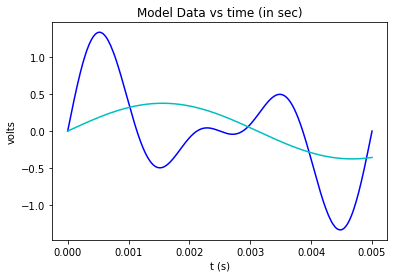

In [9]:
#calculate the model data (curve fit)
a_1_model = f1(t_data, a1_best, omega_best)

#plot the curve fit to the data
plt.figure()
plt.title('Model Data vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b-')
plt.plot(t_data, a_1_model, 'c-')
plt.show()

In this figure, the curve if the data is the blue curve and the first wave is the cyan curve.

Now let's do the same for the second curve, $a_2sin(2\omega t)$.

In [10]:
def f2(t, a_2, omega): #define the function parameters
    #return the function parameters into the equation I want to use to do a curve fit
    return  a_2*np.sin(2*omega*t) 
    
    
p0=[1,2*np.pi/0.005]
parameters, stats = curve_fit(f2, t_data, v_data, p0) #used for curve fitting
#Parameters is a list of best fit values

a2_best = parameters[0]
omega_best= parameters[1]
print(parameters)

[7.51003292e-01 1.23228195e+03]


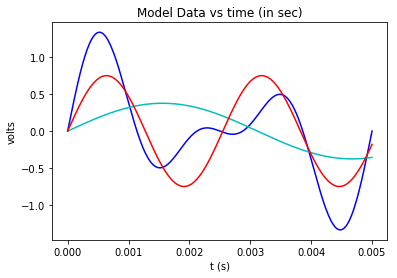

In [11]:
#calculate the model data (curve fit)
a_2_model = f2(t_data, a2_best, omega_best)

#plot the curve fit to the data
plt.figure()
plt.title('Model Data vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b-')
plt.plot(t_data, a_1_model, 'c-')
plt.plot(t_data, a_2_model, 'r-')
plt.show()

This figure shows the plot of the data in blue, the first wave in cyan and the second wave in red.

Now let's do this for the third wave, $a_3sin(3\omega t)$.

In [12]:
def f3(t, a_3, omega): #define the function parameters
    #return the function parameters into the equation I want to use to do a curve fit
    return  a_3*np.sin(3*omega*t) 
    
    
p0=[1,2*np.pi/0.005]
parameters, stats = curve_fit(f3, t_data, v_data,p0) #used for curve fitting
#Parameters is a list of best fit values

a3_best = parameters[0]
omega_best= parameters[1]

print(parameters)


[5.30400144e-01 1.28751898e+03]


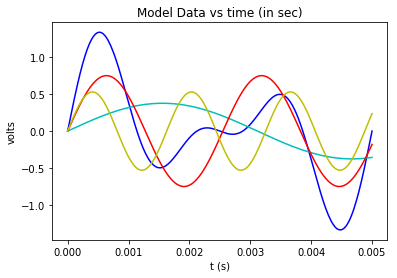

In [13]:
#calculate the model data (curve fit)
a_3_model = f3(t_data, a3_best, omega_best)

#plot the curve fit to the data
plt.figure()
plt.title('Model Data vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b-')
plt.plot(t_data, a_1_model, 'c-')
plt.plot(t_data, a_2_model, 'r-')
plt.plot(t_data, a_3_model, 'y-')
plt.show()

This figure shows the plot of the data in blue, the first wave in cyan and the second wave in red and the third wave is yellow.

Now I will display all four waves and the data wave.

In [14]:
def f4(t, a_4, omega): #define the function parameters
    #return the function parameters into the equation I want to use to do a curve fit
    return a_4*np.sin(4*omega*t)
    
    
p0=[1,2*np.pi/0.005]
parameters, stats = curve_fit(f4, t_data, v_data,p0) #used for curve fitting
#Parameters is a list of best fit values

a4_best = parameters[0]
omega_best= parameters[1]

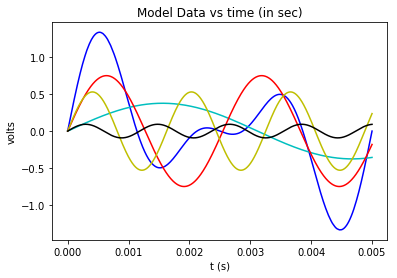

In [15]:
#calculate the model data (curve fit)
a_4_model = f4(t_data, a4_best, omega_best)

#plot the curve fit to the data
plt.figure()
plt.title('Model Data vs time (in sec)')
plt.xlabel('t (s)')
plt.ylabel('volts')
plt.plot(t_data, v_data, 'b-')
plt.plot(t_data, a_1_model, 'c-')
plt.plot(t_data, a_2_model, 'r-')
plt.plot(t_data, a_3_model, 'y-')
plt.plot(t_data, a_4_model, 'k-')
plt.show()

This figure shows all of the waves that make up this Fourier series wave. The plot of the data in blue, the first wave in cyan, the second wave in red, the third wave is yellow and the fourth wave is black.


Bibliography

Penrose, Roger *The Road To Reality* (Alfred A. Knopf) 2004

Wolfram Mathworld http://mathworld.wolfram.com/FourierSeries.html